In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pathlib

PROJECT_ROOT = pathlib.Path().cwd().parent
sys.path.append(str(PROJECT_ROOT))

from src.settings import Config
from src.utils import DataProcessor, Network, Results
from src.models import SpatialAggregation, TemporalAggregation
from src.visualization import Visualizer

import xarray as xr
import numpy as np
from numba import njit, prange
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
config = Config(
    year=2013,
    cf_k_neighbors=1,
    demand_decay_alpha=0.4,
    granularity="low",
    active_features=['position', 'time_series', 'duration_curves', 'ramp_duration_curves', 'intra_correlation']
)

# Display configuration help.
config.help()

Configuration Overview:

1. Data Preproc (Immutable):
   Contains data processing parameters. Key attributes:
   - year (int): The data year (2007-2013).
   - cf_k_neighbors (int): Neighbors for capacity factor interpolation.
   - demand_decay_alpha (float): Decay factor (0 to 1) for demand adjustments.
   - active_features (list): Features to include; allowed: 'position', 'time_series', 'duration_curves',
      'ramp_duration_curves', 'intra_correlation'.
2. Model Hyper (Mutable):
   Contains model configuration parameters. Key attributes:
   - n_representative_nodes (int): Number of representative nodes.
   - k_representative_days (int): Number of representative days (1–365).
   - inter_correlation (bool): Whether inter-node correlation is included.
   - kmed_seed (int): Seed for KMedoids (0 means no seed).
   - kmed_n_init (int): Number of KMedoids initializations.
   - weights (dict): Weights for various features. Can be manually set or auto-generated based on 
      data_preproc.a

In [4]:
processor = DataProcessor(config)

In [5]:
data = processor.processed_data

Cached processed data loaded from c:\Users\g630d\Documents\00_Cours\2024-2025_MIT\00 Thesis\dev\DATA\processed\67_counties\v1fe598c3


In [6]:
ntw = Network(data["nodes"], data["time_series"], config)

In [7]:
spatial = SpatialAggregation(ntw.features, config)

In [8]:
distances = spatial.distance_metrics

Cached metrics loaded from c:\Users\g630d\Documents\00_Cours\2024-2025_MIT\00 Thesis\Dev_SC\results\distance_metrics\vc094909a.


In [9]:
assignment_dict = spatial.aggregate()

In [10]:
temp = TemporalAggregation(config, ntw.features, assignment_dict)

In [25]:
day_weigths = {}
total_days = 0
for k, v in rep_days["clusters"].items():
    day_weigths[k] = len(v)
    total_days += len(v)

day_weigths = {k: v / total_days for k, v in day_weigths.items()}
day_weigths.values()

dict_values([0.07671232876712329, 0.08493150684931507, 0.10410958904109589, 0.13972602739726028, 0.09863013698630137, 0.10136986301369863, 0.136986301369863, 0.07123287671232877, 0.10410958904109589, 0.0821917808219178])

In [11]:
rep_days = temp.aggregate()

In [15]:
results = Results(config, data, assignment_dict, rep_days)

Results saved to c:\Users\g630d\Documents\00_Cours\2024-2025_MIT\00 Thesis\Dev_SC\results\joint_aggregation_results\va52866fd


In [16]:
visualizer = Visualizer(config, data)

In [17]:
visualizer.plot_aggregated_network(results.results)

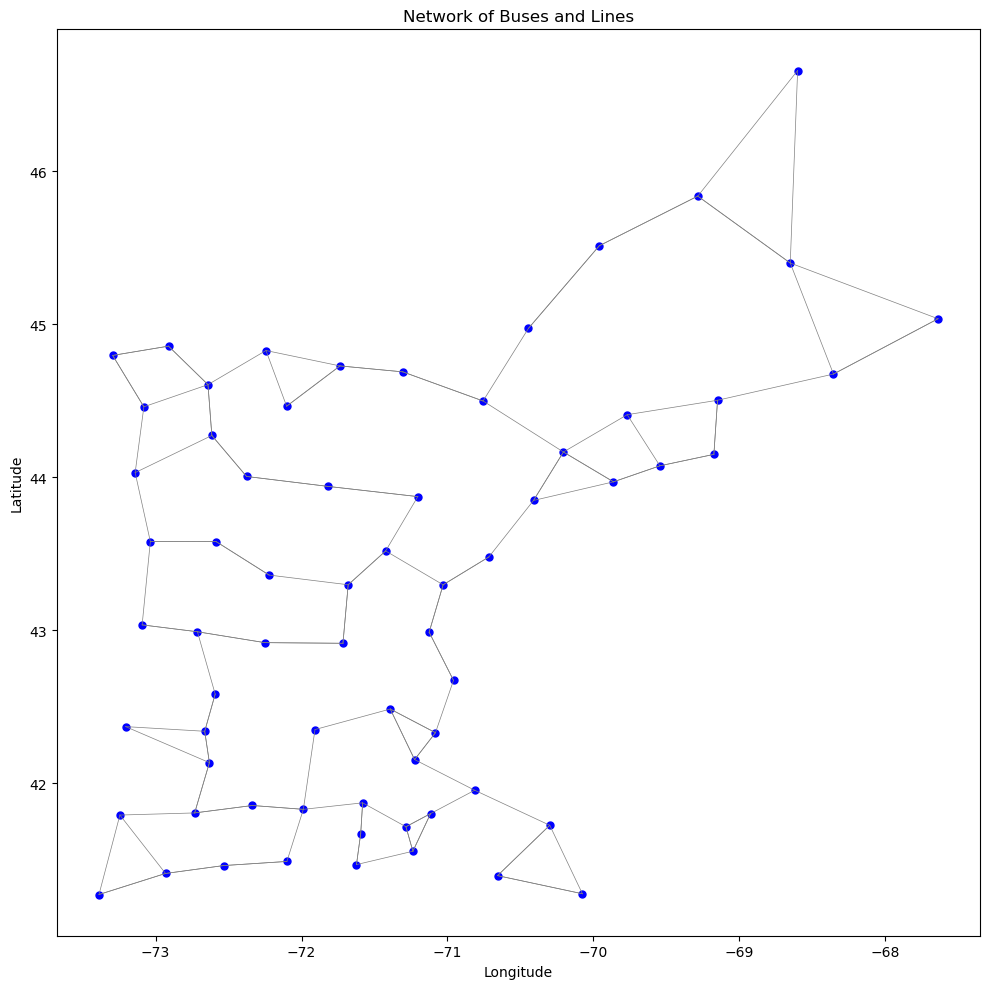

In [18]:
visualizer.plot_network();

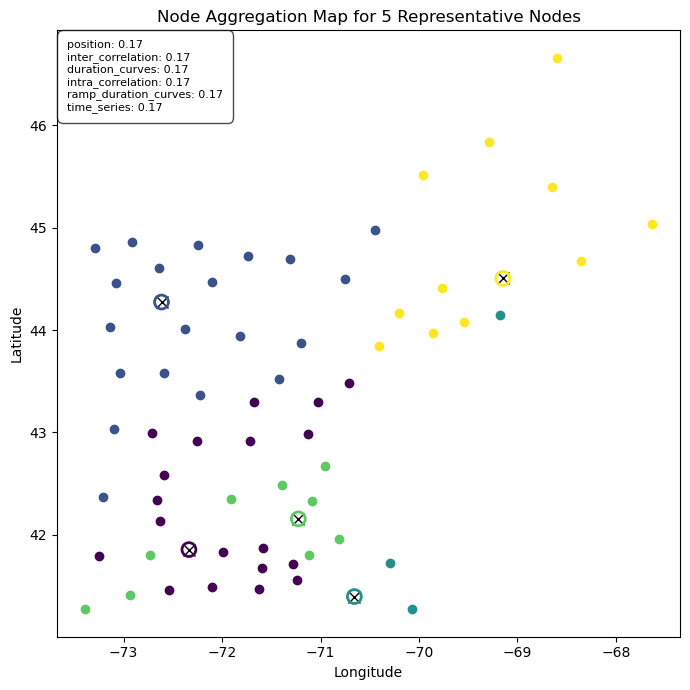

In [19]:
visualizer.plot_spatial_clusters(assignment_dict);

In [20]:
visualizer.plot_data()